<a href="https://colab.research.google.com/github/datakind/GOYN-DataDive-Nairobi-June-2023/blob/main/TalkToYourDocumentsWithHuggingFaceLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Large Language Model Answers Questions Based on Your Document for Free
### Before You Start You Will Need
- Gmail Account to Use [Google Colaboratory](https://colab.research.google.com/)
- Hugging Face API (Obtain by [Registering for Free](https://huggingface.co/))
- Note, you can see the original source of the notebook [here](https://github.com/fabiomatricardi/cdQnA/blob/acae54d6e6746f7a783320109b451f510fcc8f91/TalkToYourDocumentsWithHuggingFaceLLM.ipynb ) but I recommend following this adapted version.

### Basic Workflow


Traditionally, in the field of machine learning, we follow a workflow that looks something like this: 
collecting data, training the model, testing it and finally making 

1.   Collect Data
2.   Train the Model
3.  Test the Model
4. Use the Model on Your Own Data

When it comes to large language models, the training becomes expensive and if we want a good model out the training process, we need to provide a lot of data. This could be difficult to accomplish. On the other hand, using LLMs straight out of the box could be problematic too because they are restricted by the data on which they were trained. For example, if you ask ChatGPT about LangChain, it will tell you that it does not know what it is. That is because LangCahin was developed in 2022, whereas the training data for ChatGPT goes up until 2021.

In order to overcome these issues, an approach was created that allows us to use a pre-trained LLM out of the box by augmenting it with a knowledge base of our choosing. In this case, we will use a single .txt document. 
predictions or performing the tasks needed.  
![llm-chatbot-embedding-database[1].jpg](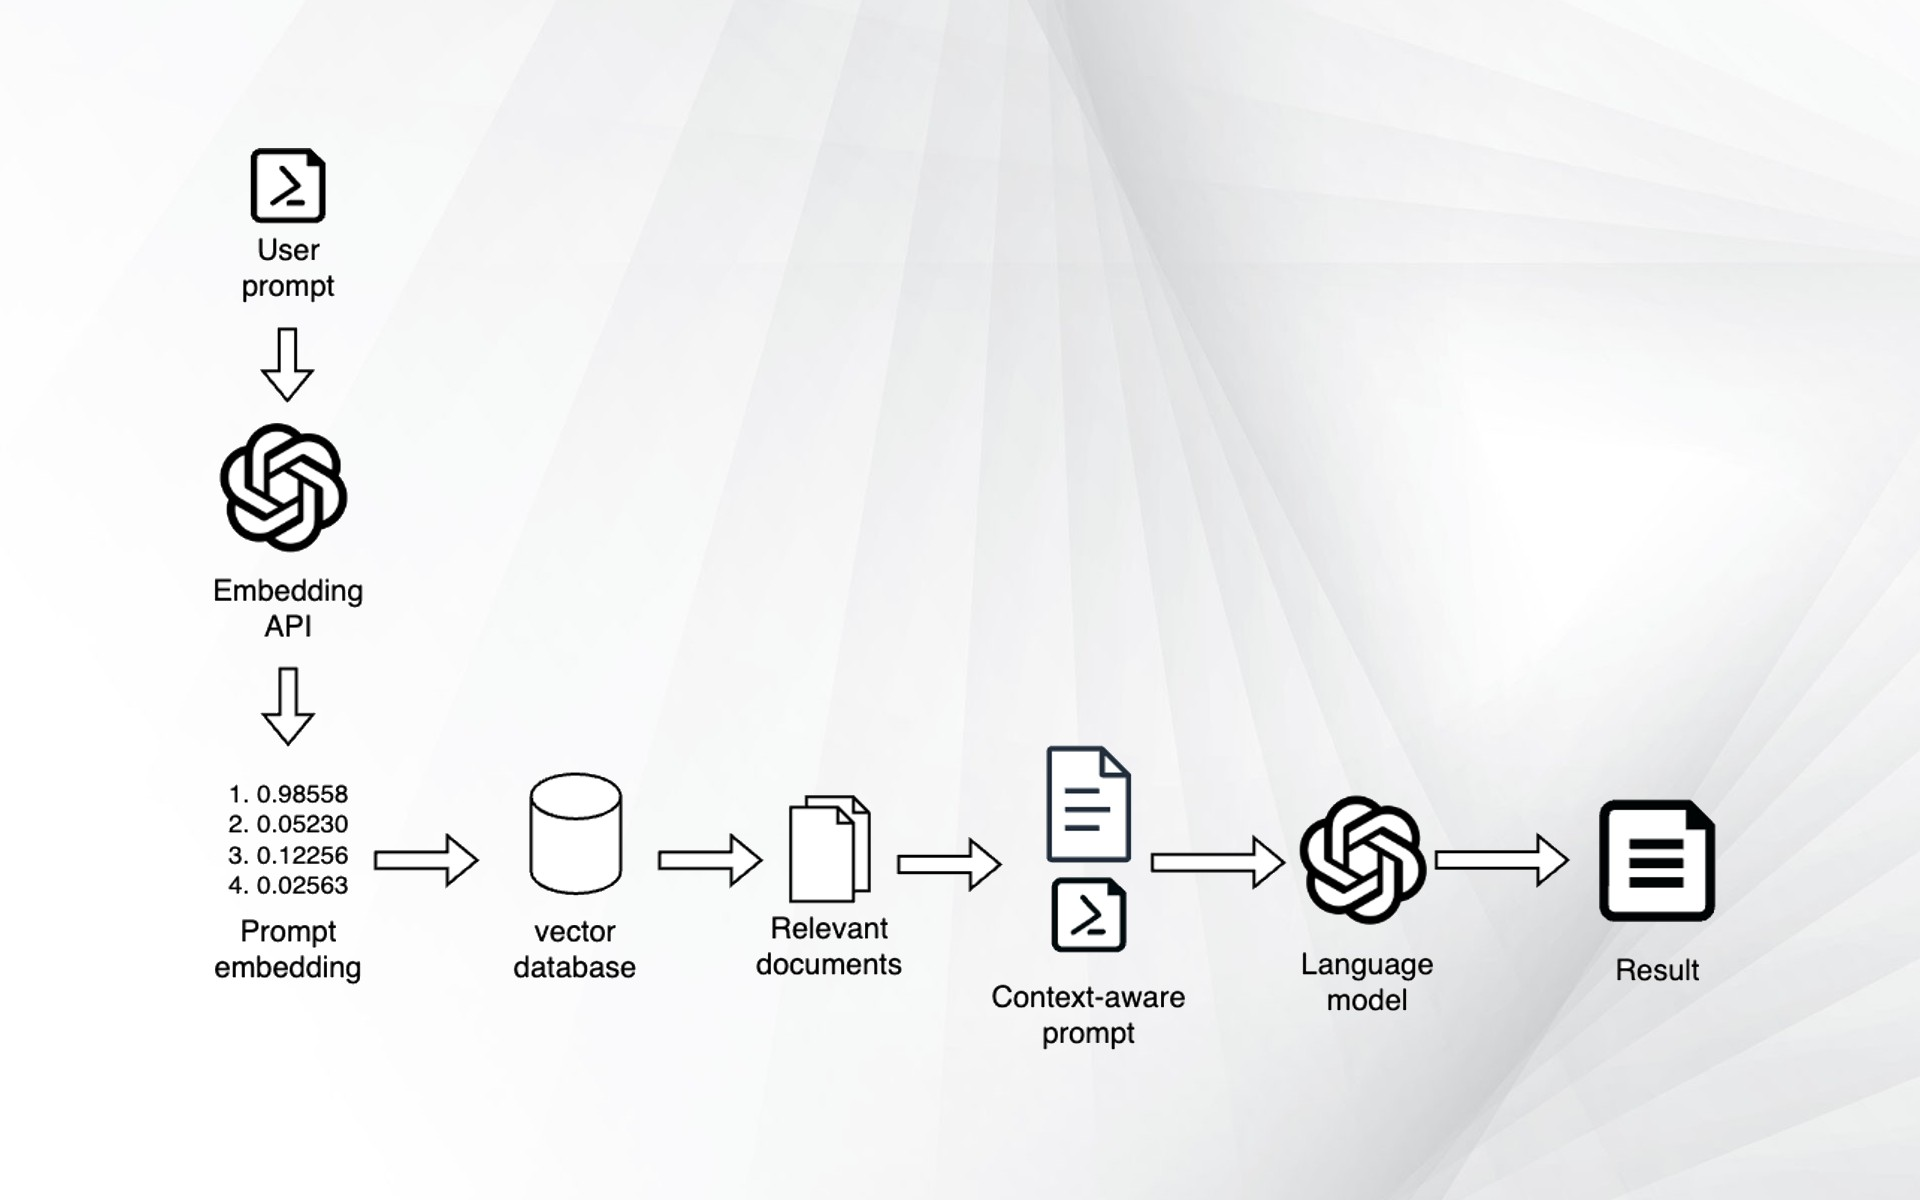)

[Image Source](https://bdtechtalks.com/2023/05/01/customize-chatgpt-llm-embeddings/amp/)

### Additional Documents/Links

*   LangChain [document loaders](https://python.langchain.com/en/latest/) 
*   HuggiingFace [website](https://huggingface.co/) 
*   [Models available](https://huggingface.co/models?pipeline_tag=question-answering&sort=likes) through HuggingFace. (We are interested in Question Answering)
*LangChain [CheatSheet](https://github.com/Tor101/LangChain-CheatSheet)



### Install Packages

In [3]:
!pip install langchain
!pip install huggingface_hub
!pip install sentence_transformers
!pip install faiss-cpu
!pip install unstructured
!pip install chromadb
!pip install Cython
!pip install tiktoken
!pip install unstructured[local-inference]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.4/969.4 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

### 🚸 restart runtime

![1_LPEMc3sK6yu0I8xrLIZtRQ[1].png](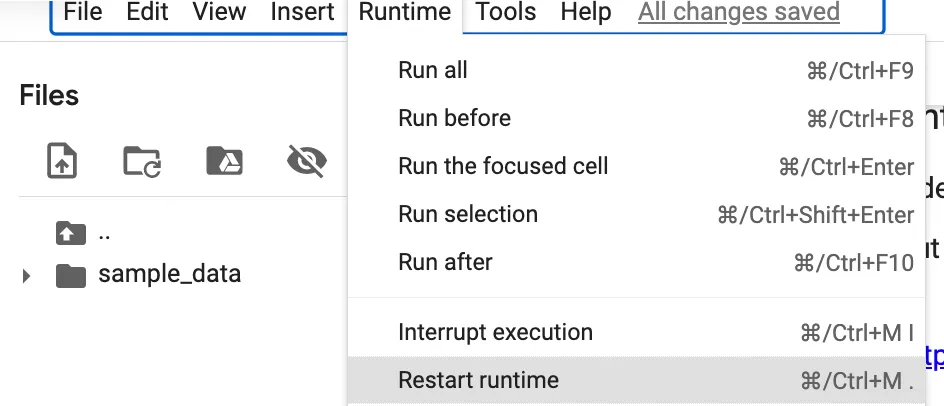)

[Image Source](https://artificialcorner.com/answering-question-about-your-documents-using-langchain-and-not-openai-2f75b8d639ae)

### Insert You HUGGINGFACEHUB_API_KEY in The Code Below (Line 3)

In [1]:
import os
import requests
os.environ["HUGGINGFACEHUB_API_TOKEN"] = ""

from langchain.document_loaders import TextLoader  #for textfiles
from langchain.text_splitter import CharacterTextSplitter #text splitter
from langchain.embeddings import HuggingFaceEmbeddings #for using HugginFace models
# Vectorstore: https://python.langchain.com/en/latest/modules/indexes/vectorstores.html
from langchain.vectorstores import FAISS  #facebook vectorizationfrom langchain.chains.question_answering import load_qa_chain
from langchain.chains.question_answering import load_qa_chain
from langchain import HuggingFaceHub
from langchain.document_loaders import UnstructuredPDFLoader  #load pdf
from langchain.indexes import VectorstoreIndexCreator #vectorize db index with chromadb
from langchain.chains import RetrievalQA
from langchain.document_loaders import UnstructuredURLLoader  #load urls into docoument-loader


### Download the Data

The data is Joe Biden's State of the Union address for year 2022. The original source can be found [here](https://www.whitehouse.gov/state-of-the-union-2022/), but we will be using an already processed .txt file accessed from a GitHub Repo.

### Download Text File

In [2]:
import requests
url2 = "https://raw.githubusercontent.com/hwchase17/langchain/master/docs/modules/state_of_the_union.txt"
res = requests.get(url2)
with open("state_of_the_union.txt", "w") as f:
  f.write(res.text)

In [3]:
# Document Loader
from langchain.document_loaders import TextLoader
loader = TextLoader('./state_of_the_union.txt')
documents = loader.load()
import textwrap

def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text
#print(wrap_text_preserve_newlines(str(documents[0])))   

### Print Content of the Document

In [27]:
documents

Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. \n\nGroups of citizen

### Create Smaller Text Chunks

You can read more about the parameters passed into the function [here](https://python.langchain.com/en/latest/modules/indexes/text_splitters/examples/character_text_splitter.html).

In [5]:
# Text Splitter
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=10)
docs = text_splitter.split_documents(documents)

### Print the Number of Chunks Created

In [6]:
len(docs)

42

### Print the First Chunk

In [7]:
docs[0]

Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world.', metadata={'source':

### Embeddings

In [8]:
# Embeddings
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

### Use Facebook's Similarity Search 
More documentation on how to use can be found [here](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/faiss.html)

In [9]:
# Create the vectorized db
# Vectorstore: https://python.langchain.com/en/latest/modules/indexes/vectorstores.html
from langchain.vectorstores import FAISS
db = FAISS.from_documents(docs, embeddings)

### Ask a Question & Search

In [28]:
query = "What did Zelensky say?"
docs = db.similarity_search(query)

In [11]:
len(docs)

4

In [29]:
print(wrap_text_preserve_newlines(str(docs[0].page_content)))

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet.
Justices of the Supreme Court. My fellow Americans.

Last year COVID-19 kept us apart. This year we are finally together again.

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans.

With a duty to one another to the American people to the Constitution.

And with an unwavering resolve that freedom will always triumph over tyranny.

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make
it bend to his menacing ways. But he badly miscalculated.

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he
never imagined.

He met the Ukrainian people.

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires
the world.


# Use LLMs to Answer the Same Question:
## ⭐ Run declare-lab/flan-alpaca-large
First run can take a bit of time but for me it took ~1 min

In [17]:
from langchain.chains.question_answering import load_qa_chain
from langchain import HuggingFaceHub

In [18]:
llm2=HuggingFaceHub(repo_id="declare-lab/flan-alpaca-large", model_kwargs={"temperature":0.7, "max_length":512 })
chain = load_qa_chain(llm2, chain_type="stuff")

In [19]:
query = "What did Zelensky say"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

"Zelensky said that the Ukraine people's fearlessness, courage, and determination inspires the world."

## ⭐ Run MBZUAI/LaMini-Flan-T5-783M
---
Results are not very good. Took ~7 min to finish and the reply is questionable.

In [20]:
llm6=HuggingFaceHub(repo_id="MBZUAI/LaMini-Flan-T5-783M", model_kwargs={"temperature":0.7, "max_length":512})
chain = load_qa_chain(llm6, chain_type="stuff")

In [94]:
query = "What did Zelensky say"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

'The provided context does not mention any specific country that was not a part of the Russian military. Therefore, the answer is "no".'

## ⭐ Run IAJw/declare-flan-alpaca-large-18378
---
Smaller model; took ~1 min to run, result is the same as the first model.

In [21]:
llm7=HuggingFaceHub(repo_id="IAJw/declare-flan-alpaca-large-18378", model_kwargs={"temperature":0, "max_length":512})
chain = load_qa_chain(llm7, chain_type="stuff")

In [22]:
query = "What did Zelensky say"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

"Zelensky said that the Ukraine people's fearlessness, courage, and determination inspires the world."



---



---



---



# To Work With OpenAI You Will Need an API Key, Api Base and Deployment Name


*   Obtain an API Key from DatKind Staff
*   You can follow the tutorial [here](https://github.com/openai/openai-cookbook/blob/main/examples/Question_answering_using_embeddings.ipynb)
*   Basic Example Provided is Obtained from [Here](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/quickstart?pivots=programming-language-python&tabs=command-*line*)


In [78]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import openai
openai.api_key = ""
openai.api_base = "openai.azure.com"
openai.api_type = 'azure'
openai.api_version = '2023-05-15'  # this may change in the future

deployment_name = ''  # This will correspond to the custom name you chose for your deployment when you deployed a model.

# Send a completion call to generate an answer
print('Sending a test completion job')
start_phrase = 'Write a tagline for an ice cream shop. '
response = openai.Completion.create(engine=deployment_name, prompt=start_phrase, max_tokens=10)
text = response['choices'][0]['text'].replace('\n', '').replace(' .', '.').strip()
print(start_phrase+text)

Sending a test completion job
Write a tagline for an ice cream shop. 3 days leftClassic C...and more!


### Question Answering